<a href="https://colab.research.google.com/github/hmk88/Learn_Data_Science/blob/master/Regression_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/hmk88/Jupyter-stuff/master/Helsinki_weather.csv'
df1 = pd.read_csv(url)    #Air temperature

In [0]:
df1.shape

(8761, 2)

In [0]:
df1.head()

,Time (h),Air temperature (degC)
0,1,9.0
1,2,8.8
2,3,9.0
3,4,9.2
4,5,8.8


In [0]:
df1= df1.drop('Time (h)', axis=1)

In [0]:
# Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Jupyter-stuff/master/as.csv'
df2 = pd.read_csv(url)    #Average surface temperature

In [0]:
df2= df2.drop('Time (h)', axis=1)

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Jupyter-stuff/master/ca.csv'
df3 = pd.read_csv(url)    #Heat capacity

In [0]:
df3= df3.drop(' Time (h)', axis=1)

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Jupyter-stuff/master/co.csv'
df4 = pd.read_csv(url)    #Thermal conductivity

In [0]:
df4= df4.drop('Time (h)', axis=1)

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Jupyter-stuff/master/de.csv'
df5 = pd.read_csv(url)    #Density

In [0]:
df5= df5.drop('Time (h)', axis=1)

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Jupyter-stuff/master/di.csv'
df6 = pd.read_csv(url)    #Diffusivity

In [0]:
df6= df6.drop('Time (h)', axis=1)

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Jupyter-stuff/master/fl.csv'
df7 = pd.read_csv(url)    #Fluid temperature

In [0]:
df7= df7.drop('Time (h)', axis=1)

In [0]:
df7.head()

,Temperature1 (degC),Temperature2 (degC),Temperature3 (degC),Temperature4 (degC),Temperature5 (degC),Temperature6 (degC),Temperature7 (degC),Temperature8 (degC),Temperature9 (degC),Temperature10 (degC),Temperature11 (degC),Temperature12 (degC),Temperature13 (degC),
0,8.000000,8.000000,7.999998,8.000000,8.000000,7.999955,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
1,8.180224,8.063855,8.476197,8.420984,8.071582,10.269369,8.046160,8.585082,8.551559,8.794622,8.107664,8.165361,8.249631,NaN
2,8.800367,8.319637,9.203323,9.066984,8.310744,11.524854,8.217538,9.393907,9.344978,9.818592,8.471061,8.702864,9.019424,NaN
3,9.571085,8.686146,9.847297,9.656515,8.624866,12.552141,8.461217,10.044680,10.042028,10.646885,8.940372,9.355491,9.901447,NaN
4,10.181274,9.013412,10.377774,10.162728,8.908517,13.374338,8.689199,10.592157,10.628046,11.318392,9.344505,9.877154,10.572640,NaN


In [0]:
df_raw = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1) # Save original data set, just in case.


In [0]:
df_raw.head()

,Air temperature (degC),Temperature (degC),Heat capacity at constant pressure (J/(kg*K)),Thermal conductivity (W/(m*K)),Density (kg/m^3),Thermal diffusivity (m^2/s),Temperature1 (degC),Temperature2 (degC),Temperature3 (degC),Temperature4 (degC),Temperature5 (degC),Temperature6 (degC),Temperature7 (degC),Temperature8 (degC),Temperature9 (degC),Temperature10 (degC),Temperature11 (degC),Temperature12 (degC),Temperature13 (degC),
0,9.0,7.999996,3200.0,2.7,850.0,9.926471e-07,8.000000,8.000000,7.999998,8.000000,8.000000,7.999955,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,NaN
1,8.8,8.007542,3200.0,2.7,850.0,9.926471e-07,8.180224,8.063855,8.476197,8.420984,8.071582,10.269369,8.046160,8.585082,8.551559,8.794622,8.107664,8.165361,8.249631,NaN
2,9.0,8.020154,3200.0,2.7,850.0,9.926471e-07,8.800367,8.319637,9.203323,9.066984,8.310744,11.524854,8.217538,9.393907,9.344978,9.818592,8.471061,8.702864,9.019424,NaN
3,9.2,8.035306,3200.0,2.7,850.0,9.926471e-07,9.571085,8.686146,9.847297,9.656515,8.624866,12.552141,8.461217,10.044680,10.042028,10.646885,8.940372,9.355491,9.901447,NaN
4,8.8,8.050804,3200.0,2.7,850.0,9.926471e-07,10.181274,9.013412,10.377774,10.162728,8.908517,13.374338,8.689199,10.592157,10.628046,11.318392,9.344505,9.877154,10.572640,NaN


In [0]:
df_raw= df_raw.dropna(how='all', axis='columns')



In [0]:
df_raw.dropna(inplace=True)

In [0]:
df_raw.head()

,Air temperature (degC),Temperature (degC),Heat capacity at constant pressure (J/(kg*K)),Thermal conductivity (W/(m*K)),Density (kg/m^3),Thermal diffusivity (m^2/s),Temperature1 (degC),Temperature2 (degC),Temperature3 (degC),Temperature4 (degC),Temperature5 (degC),Temperature6 (degC),Temperature7 (degC),Temperature8 (degC),Temperature9 (degC),Temperature10 (degC),Temperature11 (degC),Temperature12 (degC),Temperature13 (degC)
0,9.0,7.999996,3200.0,2.7,850.0,9.926471e-07,8.000000,8.000000,7.999998,8.000000,8.000000,7.999955,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
1,8.8,8.007542,3200.0,2.7,850.0,9.926471e-07,8.180224,8.063855,8.476197,8.420984,8.071582,10.269369,8.046160,8.585082,8.551559,8.794622,8.107664,8.165361,8.249631
2,9.0,8.020154,3200.0,2.7,850.0,9.926471e-07,8.800367,8.319637,9.203323,9.066984,8.310744,11.524854,8.217538,9.393907,9.344978,9.818592,8.471061,8.702864,9.019424
3,9.2,8.035306,3200.0,2.7,850.0,9.926471e-07,9.571085,8.686146,9.847297,9.656515,8.624866,12.552141,8.461217,10.044680,10.042028,10.646885,8.940372,9.355491,9.901447
4,8.8,8.050804,3200.0,2.7,850.0,9.926471e-07,10.181274,9.013412,10.377774,10.162728,8.908517,13.374338,8.689199,10.592157,10.628046,11.318392,9.344505,9.877154,10.572640


In [0]:
source= df_raw.drop('Temperature (degC)', axis=1)

In [0]:
target= df_raw['Temperature (degC)']

In [0]:
import numpy as np
#from sklearn.preprocessing import normalize

X= np.array(source)
y= np.array(target) 

#X = normalize(X, axis=0, norm='max')
#y = normalize(y.reshape(-1,1), axis=0, norm='max')


In [0]:
y.shape

(8606,)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(6884, 18) (6884,)
(1722, 18) (1722,)


In [0]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
result=svr_rbf.fit(X_train, y_train)

In [0]:
prediction=svr_rbf.predict(X_test)

Text(0.5, 1.0, 'SVR')

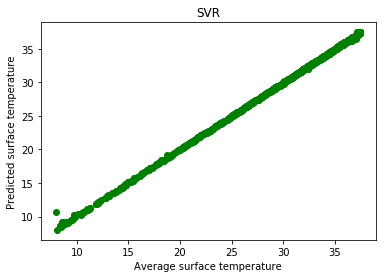

In [0]:
from matplotlib import pyplot as plt
plt.scatter(y_test, prediction, c='g')
plt.xlabel('Average surface temperature')
plt.ylabel('Predicted surface temperature')
plt.title('SVR')


In [0]:
svr_rbf.score(X_test, y_test)

0.9997928583386524

In [0]:
from sklearn import metrics

#MAE
print(metrics.mean_absolute_error(y_test, prediction))

#MSE
print(metrics.mean_squared_error(y_test, prediction))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, prediction)))

0.06248601310169894
0.010097676339409807
0.10048719490268304


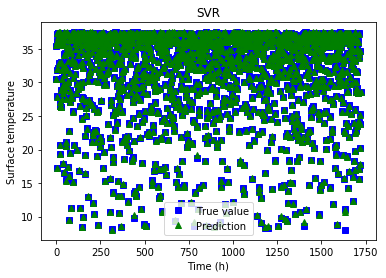

In [0]:
from matplotlib import pyplot as plt
t=range(0,1722)
plt.plot(t, y_test, 'bs', t, prediction, 'g^')
plt.xlabel('Time (h)')
plt.ylabel('Surface temperature')
plt.title('SVR')
plt.legend(['True value', 'Prediction'])

In [0]:
from sklearn.ensemble import AdaBoostRegressor

model_ada=AdaBoostRegressor(n_estimators=100)
fit=model_ada.fit(X_train, y_train)

In [0]:
prediction_ada=model_ada.predict(X_test)

In [0]:
from matplotlib import pyplot as plt
plt.plot(t, y_test, 'bs', t, prediction_ada, 'g^')
plt.xlabel('Samples')
plt.ylabel('prediction')
plt.title('adaBoost')


In [0]:
Data= [prediction_ada, y_test]

In [0]:
Data=pd.DataFrame(Data)
Data=Data.T
Data

In [0]:
Data.to_csv('ada_boost.csv') 
files.download('ada_boost.csv')

In [0]:
#MAE
print(metrics.mean_absolute_error(y_test, prediction_ada))

#MSE
print(metrics.mean_squared_error(y_test, prediction_ada))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_ada)))

In [0]:
model_ada.score(X_test, y_test)

In [0]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
fit=model_LR.fit(X_train, y_train)

In [0]:
prediction_LR=model_LR.predict(X_test)

Text(0.5, 1.0, 'Linear regression')

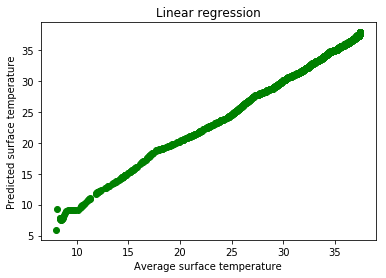

In [0]:
from matplotlib import pyplot as plt
plt.scatter(y_test, prediction_LR, c='g')
plt.xlabel('Average surface temperature')
plt.ylabel('Predicted surface temperature')
plt.title('Linear regression')

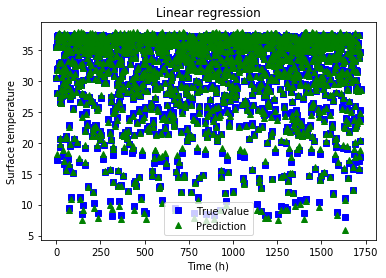

In [0]:
plt.plot(t, y_test, 'bs', t, prediction_LR, 'g^')
plt.xlabel('Time (h)')
plt.ylabel('Surface temperature')
plt.title('Linear regression')
plt.legend(['True value', 'Prediction'])

In [0]:
#MAE
print(metrics.mean_absolute_error(y_test, prediction_LR))

#MSE
print(metrics.mean_squared_error(y_test, prediction_LR))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_LR)))

0.14333901652655948
0.051591688232233285
0.22713803783653957


In [0]:
model_LR.score(X_test, y_test)

0.9989416586892924

In [0]:
from sklearn.neural_network import MLPRegressor

model_mlpr = MLPRegressor()
fit=model_mlpr.fit(X_train, y_train)

In [0]:
prediction_mlpr=model_mlpr.predict(X_test)

Text(0.5, 1.0, 'Multi-layer perceptron regressor')

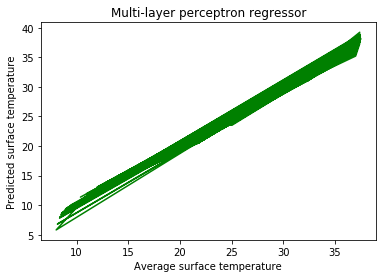

In [0]:
from matplotlib import pyplot as plt
plt.plot(y_test, prediction_mlpr, 'g')
plt.xlabel('Average surface temperature')
plt.ylabel('Predicted surface temperature')
plt.title('Multi-layer perceptron regressor')

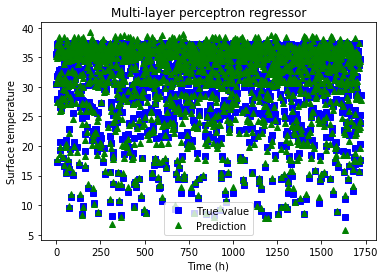

In [0]:
plt.plot(t, y_test, 'bs', t, prediction_mlpr, 'g^')
plt.xlabel('Time (h)')
plt.ylabel('Surface temperature')
plt.title('Multi-layer perceptron regressor')
plt.legend(['True value', 'Prediction'])

In [0]:
#MAE
print(metrics.mean_absolute_error(y_test, prediction_mlpr))

#MSE
print(metrics.mean_squared_error(y_test, prediction_mlpr))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_mlpr)))

0.5265927290140558
0.3791307946012548
0.6157359779980822


In [0]:
model_mlpr.score(X_test, y_test)

0.9922225886409891

In [0]:
from sklearn.ensemble import BaggingRegressor

model_bg=BaggingRegressor()
fit=model_bg.fit(X_train, y_train)
prediction_bg=model_bg.predict(X_test)

In [0]:
from matplotlib import pyplot as plt
plt.plot(t, y_test, 'bs', t, prediction_bg, 'g^')
plt.xlabel('Samples')
plt.ylabel('prediction')
plt.title('Bagging regressor')

In [0]:
#MAE
print(metrics.mean_absolute_error(y_test, prediction_bg))

#MSE
print(metrics.mean_squared_error(y_test, prediction_bg))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_bg)))

In [0]:
model_bg.score(X_test, y_test)

In [0]:
from sklearn.neighbors import KNeighborsRegressor

model_knr = KNeighborsRegressor(n_neighbors=2)
fit=model_knr.fit(X_train, y_train)
prediction_knr=model_knr.predict(X_test)


Text(0.5, 1.0, 'Kneighbors regressor')

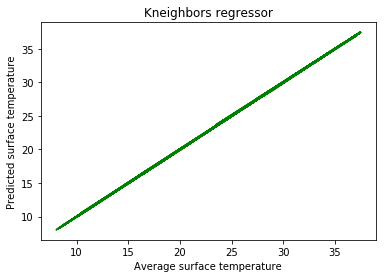

In [0]:
from matplotlib import pyplot as plt
plt.plot(y_test, prediction_knr, 'g')
plt.xlabel('Average surface temperature')
plt.ylabel('Predicted surface temperature')
plt.title('Kneighbors regressor')

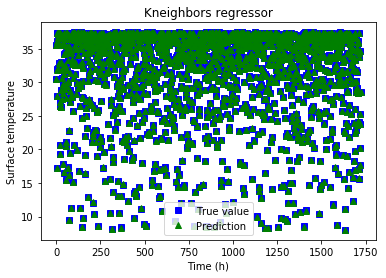

In [0]:
plt.plot(t, y_test, 'bs', t, prediction_knr, 'g^')
plt.xlabel('Time (h)')
plt.ylabel('Surface temperature')
plt.title('Kneighbors regressor')
plt.legend(['True value', 'Prediction'])

In [0]:
#MAE
print(metrics.mean_absolute_error(y_test, prediction_knr))

#MSE
print(metrics.mean_squared_error(y_test, prediction_knr))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_knr)))

0.01498114811729588
0.0006578543648416338
0.02564867179488314


In [0]:
model_knr.score(X_test, y_test)

0.9999865049104887

In [0]:
from sklearn.linear_model import HuberRegressor

model_hu = HuberRegressor()
s_train, s_test, t_train, t_test = train_test_split(source, target, test_size=0.2)

fit=model_hu.fit(s_train, t_train)
prediction_hu=model_hu.predict(s_test)


In [0]:
from matplotlib import pyplot as plt
plt.plot(t, t_test, 'bs', t, prediction_hu, 'g^')
plt.xlabel('Samples')
plt.ylabel('prediction')
plt.title('Huber regressor')

In [0]:
#MAE
print(metrics.mean_absolute_error(t_test, prediction_hu))

#MSE
print(metrics.mean_squared_error(t_test, prediction_hu))

#RMSE
print(np.sqrt(metrics.mean_squared_error(t_test, prediction_hu)))

In [0]:
model_hu.score(s_test, t_test)

In [0]:
from sklearn.linear_model import BayesianRidge

model_br = BayesianRidge()
fit=model_br.fit(X_train, y_train)
prediction_br=model_br.predict(X_test)

In [0]:
from matplotlib import pyplot as plt
plt.plot(t, y_test, 'bs', t, prediction_br, 'g^')
plt.xlabel('Samples')
plt.ylabel('prediction')
plt.title('BeysianRidge regressor')

NameError: ignored

In [0]:
#MAE
print(metrics.mean_absolute_error(y_test, prediction_br))

#MSE
print(metrics.mean_squared_error(y_test, prediction_br))

#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, prediction_br)))

In [0]:
model_br.score(X_test, y_test)

In [0]:
from datetime import datetime

date = pd.to_datetime("1st of October, 2018")
date=date + pd.to_timedelta(np.arange(8761), 'h')



Text(0.5, 1.0, 'Helsinki')

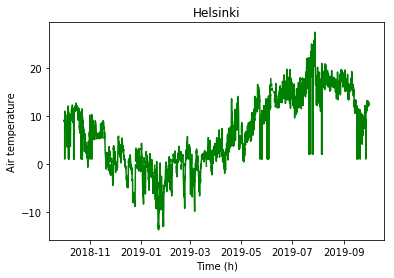

In [0]:
plt.plot(date, df1, 'g')
plt.xlabel('Time (h)')
plt.ylabel('Air temperature')
plt.title('Helsinki')

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/hmk88/Learn_Data_Science/master/inlet.csv'
inlet1 = pd.read_csv(url)    #Air temperature
inlet1= inlet1.drop('Time (h)', axis=1)

In [0]:
inlet2= inlet1

In [0]:
inlet = pd.concat([inlet1, inlet2])

In [0]:
inlet

In [0]:
from google.colab import files
inlet.to_csv('inlet.csv') 
files.download('inlet.csv')

In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/hmk88/Learn_Data_Science/master/data-USstates/as(t).csv'
df1 = pd.read_csv(url)    #Air temperature
df1= df1.drop('Time (h)', axis=1)

In [0]:
df1.shape

(8762, 1)

In [0]:
url = 'https://raw.githubusercontent.com/hmk88/Learn_Data_Science/master/as_inlet.csv'
df2 = pd.read_csv(url)    #Average surface temperature
df2= df2.drop('Time (h)', axis=1)

In [0]:
df2.shape

(8762, 1)

In [0]:
from datetime import datetime
import numpy as np

date = pd.to_datetime("1st of October, 2018")
date=date + pd.to_timedelta(np.arange(8762), 'h')

In [0]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [0]:
df1['dates'] = date
df2['dates'] = date

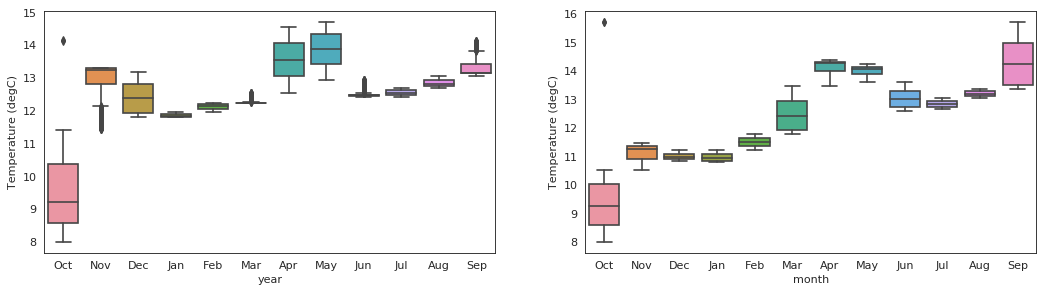

In [0]:
df1['year'] = [d.strftime('%b') for d in df1.dates]
df2['month'] = [d.strftime('%b') for d in df2.dates]
#years = df['year'].unique()

# Draw Plot

fig, axes = plt.subplots(1, 2, figsize=(16,4), dpi= 80)
sns.boxplot(x='year', y='Temperature (degC)', data=df1, ax=axes[0])
sns.boxplot(x='month', y='Temperature (de  gC)', data=df2)

# Set Title
#axes[0].set_title('Average surface temperature\n(Constant inlet temperature)', fontsize=18); 
#axes[1].set_title('Average surface temperature\n(With inlet temperature variation)', fontsize=18)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


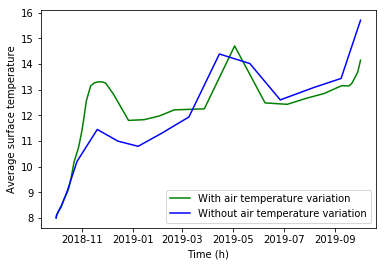

In [0]:
from matplotlib import pyplot as plt
plt.plot(date, df1, 'g', date, df2, 'b')
plt.xlabel('Time (h)')
plt.ylabel('Average surface temperature')
#plt.title('Helsinki')
plt.legend(['With air temperature variation', 'Without air temperature variation'])

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/hmk88/Learn_Data_Science/master/inlet_4140.csv'
df = pd.read_csv(url)    #Average surface temperature
df= df.drop('Time (h)', axis=1)

Text(0, 0.5, 'Inlet temperature (degC)')

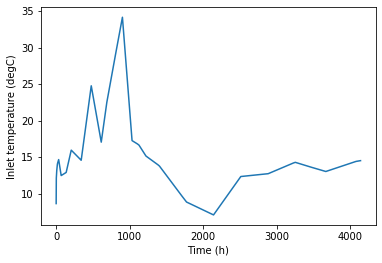

In [0]:
from matplotlib import pyplot as plt
plt.plot(df)
plt.xlabel('Time (h)')
plt.ylabel('Inlet temperature (degC)')

In [0]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# 1. Moving Average
df_ma = df.(3, center=True, closed='both').mean()
